In [17]:
import numpy as np
import os, json
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 110) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 110) #replace n with the number of rows you want to see completely
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
def read_data(path):
    for f in os.listdir(path):
        if f.endswith(".json"):
            with open(os.path.join(path, f), "r") as h:
                data = json.loads(h.read())
                for scen in data['scenarios']:
                    data_file = os.path.join(path, scen['path'])
                    with open(data_file) as d:
                        runs = []
                        run = None
                        for line in d:
                            if line.startswith("evaluations"):
                                if run is not None:
                                    runs.append(np.array(run))
                                run = []
                                continue
                            run.append(list(map(float, line.strip().split())))
    
    return runs

# OM
## Reading Runtime Files

In [4]:
path_OM = "/Users/fye/Codes/Git/GSEMO/csv/om"

alg_options = ['varctrl','static','normea','TwoRate','logNormal', "OBJAdapt"]
metric_options = ['HV','IGD', 'OneObj%10','OneObj%50']
def extract_algorithm_info(algorithm_tag):
    for alg in alg_options:
        if algorithm_tag.find(alg) != -1:
            algorithm = alg
            algorithm_tag = algorithm_tag.replace(alg,'')
            break
    found_metric = False
    for m in metric_options:
        if algorithm_tag.find(m) != -1:
            metric = m
            algorithm_tag = algorithm_tag.replace(m,'')
            found_metric = True
    if not found_metric:
        metric = 'OneObj'
        algorithm_tag = algorithm_tag.replace(metric,'')
    algorithm_tag = algorithm_tag[1:]
    algorithm_tag = algorithm_tag.split('P')
    Lambda = algorithm_tag[0]
    Pm = algorithm_tag[1]
    return algorithm, metric, Lambda, Pm



## Get ERT table

In [15]:
def get_ert(file):
#     print(f)
    rawdata = pd.read_csv(file)
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    ert = (np.sum(runtime) + 1000000 * (100 - success)) / 100
    return success/ 100.0, ert, np.var(runtime)

def get_rt(file):
#     print(f)
    rawdata = pd.read_csv(file)
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    ert = (np.sum(runtime) + 1000000 * (100 - success)) / 100
    return runtime

In [15]:
files = os.listdir(path_OM)
# files = ['/Users/fye/Codes/Git/GSEMO/csv/om/staticL10P1HVOneMaxD100.csv']
# print(files)
ERT_table_OM = []
for f in files:
    print(f)
    line = list(extract_algorithm_info(f[:-14]))
    line.extend(list(get_ert(os.path.join(path_OM,f))))
    ERT_table_OM.append(line)
ERT_table_OM = pd.DataFrame(ERT_table_OM,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_OM

varctrlL20P1IGDOneMaxD100.csv
staticL50P1HVOneMaxD100.csv
varctrlL30P1OneObj%50OneMaxD100.csv
varctrlL30P1IGDOneMaxD100.csv
TwoRateL40P1HVOneMaxD100.csv
TwoRateL30P1OneObj%10OneMaxD100.csv
logNormalL10P1OneObj%50OneMaxD100.csv
logNormalL30P1OneObj%10OneMaxD100.csv
TwoRateL10P1OneObj%50OneMaxD100.csv
logNormalL30P1HVOneMaxD100.csv
varctrlL10P1OneObj%10OneMaxD100.csv
varctrlL10P1IGDOneMaxD100.csv
logNormalL40P1OneObjOneMaxD100.csv
logNormalL40P1OneObj%10OneMaxD100.csv
varctrlL30P1HVOneMaxD100.csv
varctrlL50P1IGDOneMaxD100.csv
TwoRateL40P1OneObj%10OneMaxD100.csv
varctrlL40P1OneObj%50OneMaxD100.csv
logNormalL30P1OneObjOneMaxD100.csv
varctrlL40P1IGDOneMaxD100.csv
TwoRateL10P1HVOneMaxD100.csv
logNormalL20P1OneObjOneMaxD100.csv
varctrlL10P1OneObj%50OneMaxD100.csv
TwoRateL10P1OneObj%10OneMaxD100.csv
logNormalL30P1OneObj%50OneMaxD100.csv
logNormalL10P1OneObj%10OneMaxD100.csv
TwoRateL30P1OneObj%50OneMaxD100.csv
logNormalL50P1OneObjOneMaxD100.csv
varctrlL30P1OneObj%10OneMaxD100.csv
varctrlL50P1HV

,algorithm,metric,Lambda,Pm,ps,ERT,var
0,varctrl,IGD,20,1,1.0,225271.21,5.493274e+09
1,static,HV,50,1,1.0,65200.32,4.928085e+08
2,varctrl,OneObj%50,30,1,1.0,100533.08,1.530525e+09
3,varctrl,IGD,30,1,1.0,227117.34,9.957305e+09
4,TwoRate,HV,40,1,1.0,59435.62,2.856427e+08
5,TwoRate,OneObj%10,30,1,1.0,84142.89,6.799198e+08
6,logNormal,OneObj%50,10,1,1.0,83078.33,1.165359e+09
7,logNormal,OneObj%10,30,1,1.0,66265.78,5.020364e+08
8,TwoRate,OneObj%50,10,1,1.0,97240.41,7.451151e+08
9,logNormal,HV,30,1,1.0,128556.49,2.644168e+09


## Plot Convergence Line

In [6]:
def pareto_txt_1(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[0]

def pareto_txt_2(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[1]

def get_fixed_target(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'target']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    if info[0] == 'varctrl':
        info[0] = 'var-ctrl'
    if info[0] == 'TwoRate':
        info[0] = 'two-rate'
    if info[0] == 'logNormal':
        info[0] = 'log-normal'
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):
        t = rawdata.loc[rawdata['y1'] == i]
        result = []
        for j in range(19):
            tt = t['First_hit' + str(j)].values[0]
            if tt != -1:
                result.append(tt)
            else:
                result.append(9999999)
        col = list(extract_algorithm_info(rawdata['algorithm'][0]))
        col.extend([len(result)/19.0, np.mean(result), np.var(result), i])
        fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target



In [17]:
files = os.listdir(path_OM)

columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'target']
FT_OM = pd.DataFrame([],columns = columns)
for f in files:
    FT_OM = FT_OM.append(get_fixed_target(os.path.join(path_OM,f)))
FT_OM

,algorithm,metric,Lambda,Pm,ps,ERT,var,target
0,varctrl,IGD,20,1,1.0,184681.736842,6.803407e+09,0
0,varctrl,IGD,20,1,1.0,116983.736842,1.097786e+09,1
0,varctrl,IGD,20,1,1.0,90072.263158,4.584687e+08,2
0,varctrl,IGD,20,1,1.0,72129.789474,4.342319e+08,3
0,varctrl,IGD,20,1,1.0,59610.263158,2.709661e+08,4
...,...,...,...,...,...,...,...,...
0,varctrl,HV,10,1,1.0,55281.526316,2.546605e+08,96
0,varctrl,HV,10,1,1.0,65981.842105,4.850855e+08,97
0,varctrl,HV,10,1,1.0,95908.421053,1.348856e+09,98
0,varctrl,HV,10,1,1.0,127249.315789,1.691705e+09,99


In [18]:
dt = ERT_table_OM.loc[(ERT_table_OM['Lambda'] == '10')]
dt = dt.pivot(index='algorithm', columns='metric', values='ERT')
print(dt.to_latex(float_format="{:0.0f}".format))
dt

\begin{tabular}{lrrrrr}
\toprule
metric &     HV &    IGD &  OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &        &        &         &            &            \\
\midrule
TwoRate   &  61624 &  62039 &  102509 &     104716 &      97240 \\
logNormal & 134859 & 143533 &   78679 &      80495 &      83078 \\
static    &  68375 &    NaN &     NaN &        NaN &        NaN \\
varctrl   & 205175 & 214801 &  135643 &     136596 &     130143 \\
\bottomrule
\end{tabular}



metric,HV,IGD,OneObj,OneObj%10,OneObj%50
algorithm,,,,,
TwoRate,61623.78,62038.79,102508.86,104716.50,97240.41
logNormal,134859.29,143532.69,78678.67,80495.42,83078.33
static,68374.99,NaN,NaN,NaN,NaN
varctrl,205174.81,214801.37,135643.19,136595.92,130143.09


In [19]:
dt = ERT_table_OM.loc[(ERT_table_OM['Lambda'] == '10')]
dt = dt.pivot(index='algorithm', columns='metric', values='var')
print(dt.to_latex(float_format="{:.3e}".format))
dt

\begin{tabular}{lrrrrr}
\toprule
metric &        HV &       IGD &    OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &           &           &           &            &            \\
\midrule
TwoRate   & 3.271e+08 & 3.427e+08 & 8.226e+08 &  1.206e+09 &  7.451e+08 \\
logNormal & 2.201e+09 & 3.310e+09 & 6.016e+08 &  7.462e+08 &  1.165e+09 \\
static    & 4.208e+08 &       NaN &       NaN &        NaN &        NaN \\
varctrl   & 5.840e+09 & 5.697e+09 & 1.950e+09 &  2.188e+09 &  1.688e+09 \\
\bottomrule
\end{tabular}



metric,HV,IGD,OneObj,OneObj%10,OneObj%50
algorithm,,,,,
TwoRate,3.270851e+08,3.427418e+08,8.226153e+08,1.205568e+09,7.451151e+08
logNormal,2.201075e+09,3.310053e+09,6.015702e+08,7.462221e+08,1.165359e+09
static,4.207598e+08,NaN,NaN,NaN,NaN
varctrl,5.840156e+09,5.696936e+09,1.949866e+09,2.188117e+09,1.688401e+09


## Read Adaptive Mutation Rate

In [21]:
metric_dict = {1: 'HV', 2:'IGD', 3:'NUM', 4:'OneObj%10', 5:'OneObj%50', 6:'OneObj'}
algorithm_dict = {'varctrl': 'var-ctrl', 'normea': 'normea', 'logNormal': 'log-normal', 'TwoRate': 'two-rate'}
def get_mutation_rate_selfadaptation(file_name):
    info = file_name[:-4]
    info = info.split('-')

    Lambda = int(info[2][1:])
    metric = int(info[3][1:])
    algorithm = info[1]

    MR =  pd.DataFrame()
    with open(os.path.join("/Users/fye/Codes/Git/GSEMO/MR/om/run_om", file_name)) as f:
        run = 0
        pause = False
        mr_runs = []
        for line in f:
            if line[0] == '{':
                pause = True
    #             print()
                MR = pd.concat([MR, pd.DataFrame(mr_runs,columns=['run'+str(run)])],axis = 1)
                mr_runs = []
                run += 1

                MR['Lambda'] = Lambda
                MR['metric'] = metric_dict[metric]
                MR['algorithm'] = algorithm_dict[algorithm]
                MR['index1'] = MR.index.copy()
                return MR

                continue
            if line[0] == ')':
                pause = False
                continue
            if not pause:
                value = line.strip()
                if (algorithm == 'varctrl'):
                    value = value.split(' ')[0]
                    value = float(value)/100.0
                if (algorithm == 'TwoRate'):
                    value = float(value)/100.0
                mr_runs.append(float(value))
         


In [22]:
path_OM_MR = '/Users/fye/Codes/Git/GSEMO/MR/om'
files = os.listdir(path_OM_MR)
columns = ['Lambda', 'metric','algorithm', 'index1','run0']
MR_OM = pd.DataFrame([],columns = columns)
for f in files:
    MR_OM = pd.concat([MR_OM,get_mutation_rate_selfadaptation(os.path.join(path_OM_MR,f))], ignore_index=True)
#     MR_OM = MR_OM.append(get_mutation_rate_selfadaptation(os.path.join(path_OM_MR,f)))
MR_OM


,Lambda,metric,algorithm,index1,run0
0,50,OneObj%10,var-ctrl,0,0.020000
1,50,OneObj%10,var-ctrl,1,0.050000
2,50,OneObj%10,var-ctrl,2,0.040000
3,50,OneObj%10,var-ctrl,3,0.080000
4,50,OneObj%10,var-ctrl,4,0.200000
...,...,...,...,...,...
814829,50,OneObj,log-normal,1298,0.005576
814830,50,OneObj,log-normal,1299,0.004714
814831,50,OneObj,log-normal,1300,0.004456
814832,50,OneObj,log-normal,1301,0.004887


In [ ]:
dt_plot = MR_OM.copy()
dt_plot = dt_plot.loc[~dt_plot['algorithm'].str.contains('normea')]
dt_plot = dt_plot.loc[(dt_plot['Lambda']==10) & (dt_plot['index1'] < 10000) & (dt_plot['index1'] % 50== 0)]
dt_plot
# dt_plot.index.duplicated()

,Lambda,metric,algorithm,index1,run0
42701,10,IGD,log-normal,0,0.010791
42751,10,IGD,log-normal,50,0.004977
42801,10,IGD,log-normal,100,0.063684
42851,10,IGD,log-normal,150,0.120652
42901,10,IGD,log-normal,200,0.122004
...,...,...,...,...,...
781460,10,HV,var-ctrl,9750,0.030000
781510,10,HV,var-ctrl,9800,0.080000
781560,10,HV,var-ctrl,9850,0.010000
781610,10,HV,var-ctrl,9900,0.320000


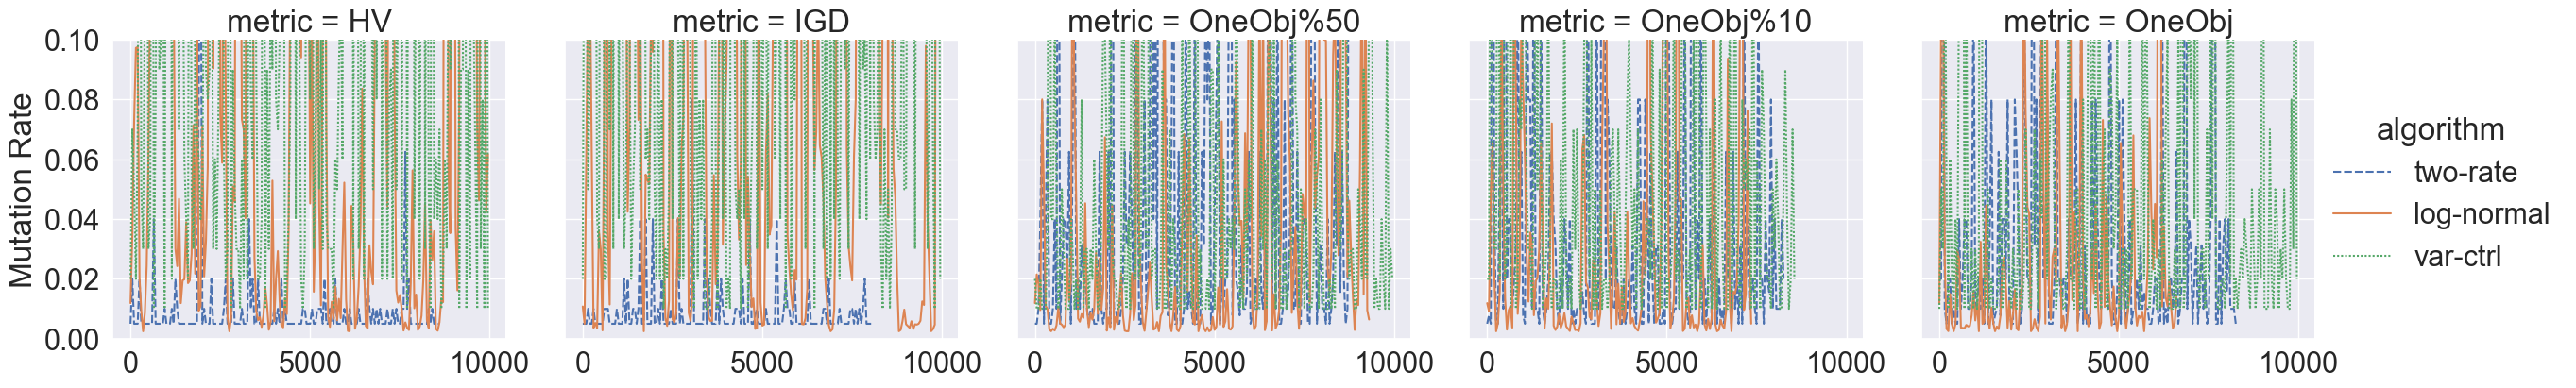

In [ ]:
# sns.catplot(x='index1', y='run0', hue='algorithm',data = dt_plot, style = 'metric') 

hue_order= ['two-rate','log-normal','var-ctrl']
col_order = ['HV', 'IGD', 'OneObj%50','OneObj%10', 'OneObj']
om_mr = sns.relplot(data=dt_plot, x="index1", y="run0", hue_order = hue_order, col_order = col_order, hue="algorithm", style="algorithm",col="metric", kind = 'line')
# om_mr = sns.relplot(data=dt_plot, x="index1", y="run0", hue="metric", style="metric",col="algorithm", kind = 'line')
sns.set(font_scale = 2)
om_mr.set(xlabel=None)
# om_mr.set(xticklabels=list(range(0,10000,2500)))
om_mr.set(ylabel='Mutation Rate')
plt.ylim(0, 0.1)
plt.show()
om_mr.savefig("om_mr.png") 

## Regarding Lambda

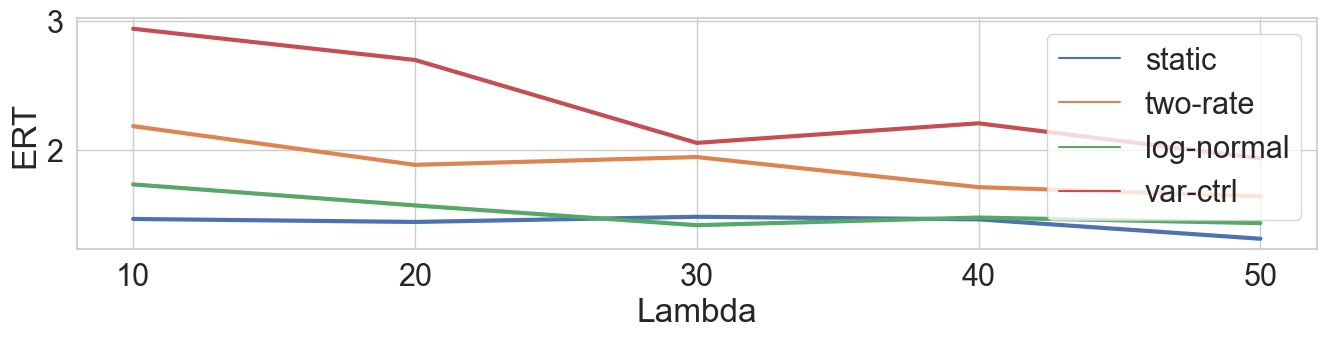

In [ ]:
# dt = ERT_table_OM.loc[ (ERT_table_OM['algorithm'] == 'TwoRate') | (ERT_table_OM['algorithm'] == 'logNormal') | (ERT_table_OM['algorithm'] == 'varctrl')]
dt = ERT_table_OM.loc[(ERT_table_OM['algorithm'] == 'static') | (ERT_table_OM['algorithm'] == 'TwoRate') | (ERT_table_OM['algorithm'] == 'logNormal') | (ERT_table_OM['algorithm'] == 'varctrl')]
dt.loc[((dt['algorithm'] == 'static') & (dt['metric'] =='HV')),'metric'] = 'OneObj'
# 
dt = dt[(dt['metric'] == 'OneObj') & (dt['Lambda'] != '2')& (dt['Lambda'] != '5') & (dt['Pm'].str.find('Self') == -1)]
dt['ERT'] = dt['ERT'].astype('float')
dt['Lambda'] = dt['Lambda'].astype('int')
# dt = dt.pivot(columns='algorithm', index='Lambda', values='ERT')
# print(dt.to_latex())
dt.loc[dt['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt.loc[dt['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt.loc[dt['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'

plt.figure(figsize=(16,3))
dt['ERT'] = np.array((dt['ERT'].astype('float')))/100/100/np.log([100])[0]
dt
hue_order= ['static','two-rate','log-normal','var-ctrl']
# # fig, ax = plt.subplots(ncol=1,figsize=(10,4))
lom = sns.lineplot(data=dt, x = 'Lambda', y = 'ERT',linewidth =3, hue = 'algorithm', markers = True, hue_order=hue_order)
sns.set(font_scale = 2)
lom.set_xticks([10,20,30,40,50])
sns.set_style("whitegrid")
plt.legend(loc='upper right')
#plt.yscale('log')
plt.show()
lom = lom.get_figure()
lom.savefig('OM-Obj-lambda.png')

# LO
## Reading Runtime Files

In [14]:
path_LO = "/Users/fye/Codes/Git/GSEMO/csv/lo"

alg_options = ['varctrl','static','normea','TwoRate','logNormal', "OBJAdapt",'AGSEMO','AGSEO']

metric_options = ['HV','IGD','OneObj%10','OneObj%50']
def extract_algorithm_info(algorithm_tag):
    for alg in alg_options:
        if algorithm_tag.find(alg) != -1:
            algorithm = alg
            algorithm_tag = algorithm_tag.replace(alg,'')
            break
    found_metric = False
    for m in metric_options:
        if algorithm_tag.find(m) != -1:
            metric = m
            algorithm_tag = algorithm_tag.replace(m,'')
            found_metric = True
    if not found_metric:
        metric = 'OneObj'
        algorithm_tag = algorithm_tag.replace(metric,'')
    algorithm_tag = algorithm_tag[1:]
    algorithm_tag = algorithm_tag.split('P')
    Lambda = algorithm_tag[0]
    Pm = algorithm_tag[1]
    return algorithm, metric, Lambda, Pm

def pareto_txt_1(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[0]

def pareto_txt_2(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[1]

def get_ert_lo(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))
    rawdata = rawdata.loc[rawdata['y1'] + rawdata['y2'] == 100]
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    ert = (np.sum(runtime) + 1000000 * (100 - success)) / 100
    return success/ 100.0, ert, np.var(runtime)

def get_rt_lo(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))
    rawdata = rawdata.loc[rawdata['y1'] + rawdata['y2'] == 100]
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    ert = (np.sum(runtime) + 1000000 * (100 - success)) / 100
    return runtime

In [26]:
files = os.listdir(path_LO)
ERT_table_LO = []
for f in files:
    print(f)
    line = list(extract_algorithm_info(f[:-19]))
    line.extend(list(get_ert_lo(os.path.join(path_LO,f))))
    ERT_table_LO.append(line)
ERT_table_LO = pd.DataFrame(ERT_table_LO,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_LO

varctrlL10P1IGDLeadingOnesD100.csv
logNormalL20P1OneObj%10LeadingOnesD100.csv
varctrlL20P1OneObjLeadingOnesD100.csv
TwoRateL20P1IGDLeadingOnesD100.csv
varctrlL50P1IGDLeadingOnesD100.csv
varctrlL40P1HVLeadingOnesD100.csv
logNormalL40P1OneObj%10LeadingOnesD100.csv
TwoRateL20P1HVLeadingOnesD100.csv
varctrlL50P1OneObj%50LeadingOnesD100.csv
logNormalL30P1OneObjLeadingOnesD100.csv
varctrlL30P1OneObj%50LeadingOnesD100.csv
TwoRateL10P1OneObj%10LeadingOnesD100.csv
logNormalL40P1OneObj%50LeadingOnesD100.csv
logNormalL40P1HVLeadingOnesD100.csv
logNormalL20P1OneObj%50LeadingOnesD100.csv
staticL40P1HVLeadingOnesD100.csv
logNormalL10P1IGDLeadingOnesD100.csv
TwoRateL10P1OneObj%50LeadingOnesD100.csv
varctrlL30P1OneObj%10LeadingOnesD100.csv
TwoRateL30P1OneObjLeadingOnesD100.csv
logNormalL50P1IGDLeadingOnesD100.csv
varctrlL50P1OneObj%10LeadingOnesD100.csv
logNormalL50P1OneObj%10LeadingOnesD100.csv
logNormalL20P1OneObjLeadingOnesD100.csv
TwoRateL50P1HVLeadingOnesD100.csv
logNormalL30P1OneObj%10LeadingOne

,algorithm,metric,Lambda,Pm,ps,ERT,var
0,varctrl,IGD,10,1,1.0,944020.94,5.924565e+10
1,logNormal,OneObj%10,20,1,1.0,327105.00,4.693053e+09
2,varctrl,OneObj,20,1,1.0,259983.13,2.566355e+09
3,TwoRate,IGD,20,1,1.0,334222.17,6.908934e+09
4,varctrl,IGD,50,1,1.0,993327.59,8.027844e+10
5,varctrl,HV,40,1,1.0,520218.01,3.563776e+10
6,logNormal,OneObj%10,40,1,1.0,327818.42,4.114268e+09
7,TwoRate,HV,20,1,1.0,362531.27,6.018620e+09
8,varctrl,OneObj%50,50,1,1.0,267196.20,4.441515e+09
9,logNormal,OneObj,30,1,1.0,327009.78,5.376079e+09


In [27]:
dt = ERT_table_LO.loc[(ERT_table_LO['Lambda'] == '10')]
dt['ERT'].astype('float')
dt = dt.pivot(index='algorithm', columns='metric', values='ERT')
print(dt.to_latex(float_format="{:0.0f}".format))
# dt

\begin{tabular}{lrrrrr}
\toprule
metric &     HV &    IGD &  OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &        &        &         &            &            \\
\midrule
TwoRate   & 370956 & 352083 &  409658 &     405611 &     423125 \\
logNormal & 374231 & 728462 &  318825 &     332063 &     341046 \\
static    & 340072 &    NaN &     NaN &        NaN &        NaN \\
varctrl   & 432273 & 944021 &  272628 &     284322 &     263883 \\
\bottomrule
\end{tabular}



In [28]:
dt = ERT_table_LO.loc[(ERT_table_LO['Lambda'] == '10')]
dt['var'].astype('float')
dt = dt.pivot(index='algorithm', columns='metric', values='var')
print(dt.to_latex(float_format="{:.3e}".format))
# dt

\begin{tabular}{lrrrrr}
\toprule
metric &        HV &       IGD &    OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &           &           &           &            &            \\
\midrule
TwoRate   & 6.602e+09 & 6.209e+09 & 8.429e+09 &  8.751e+09 &  1.058e+10 \\
logNormal & 9.614e+09 & 3.040e+10 & 5.537e+09 &  5.896e+09 &  6.458e+09 \\
static    & 5.946e+09 &       NaN &       NaN &        NaN &        NaN \\
varctrl   & 2.913e+10 & 5.925e+10 & 3.770e+09 &  4.695e+09 &  4.036e+09 \\
\bottomrule
\end{tabular}



## PLot Convergence

In [29]:
def pareto_txt_1(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[0]

def pareto_txt_2(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[1]

def get_fixed_target_lo(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1', 'y2']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):
        for j in range(0, 101 - i):
            t = rawdata[(rawdata['y1'] == i) & (rawdata['y2'] == j)]
            result = []
            for h in range(19):
                tt = t['First_hit' + str(h)].values[0]
                if tt != -1:
                    result.append(tt)
#                 else:
#                     result.append(5000000)
            col = list(extract_algorithm_info(rawdata['algorithm'][0]))
            col.extend([len(result)/19.0, np.mean(result), np.var(result), i, j])
            fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target

def get_fixed_target_lo_y1(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):       
        t = rawdata.loc[rawdata['y1'] == i]
        result = []
        for h in range(100):
            t.loc[t['First_hit'+ str(h)]== -1, 'First_hit'+ str(h)] = 5000000
            tt = np.min(t['First_hit' + str(h)].values)
            if tt != -1:
                result.append(tt)
            else:
                result.append(5000000)
        col = list(extract_algorithm_info(rawdata['algorithm'][0]))
        col.extend([len(result)/100.0, np.mean(result), np.var(result), i])
        fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target

def get_fixed_target_lo_y2(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y2']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):       
        t = rawdata.loc[rawdata['y2'] == i]
        result = []
        for h in range(100):
            t.loc[t['First_hit'+ str(h)]== -1, 'First_hit'+ str(h)] = 5000000
            tt = np.min(t['First_hit' + str(h)].values)
            if tt != -1:
                result.append(tt)
            else:
                result.append(5000000)
        col = list(extract_algorithm_info(rawdata['algorithm'][0]))
        col.extend([len(result)/100.0, np.mean(result), np.var(result), i])
        fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target


In [30]:
path_LO = '/Users/fye/Codes/Git/GSEMO/csv/lo'
files = os.listdir(path_LO)

columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1', 'y2']
FT_LO = pd.DataFrame([],columns = columns)
for f in files:
    if (f.find("L10") == -1) or (f.find("norm") != -1) or (f.find("Self")!= -1) or (f.find("IGD")!= -1) or (f.find("%")!= -1):
        continue
    print(f)
    FT_LO = FT_LO.append(get_fixed_target_lo(os.path.join(path_LO,f)))
FT_LO

TwoRateL10P1HVLeadingOnesD100.csv
TwoRateL10P1OneObjLeadingOnesD100.csv
varctrlL10P1HVLeadingOnesD100.csv
logNormalL10P1HVLeadingOnesD100.csv
logNormalL10P1OneObjLeadingOnesD100.csv
staticL10P1HVLeadingOnesD100.csv
varctrlL10P1OneObjLeadingOnesD100.csv


,algorithm,metric,Lambda,Pm,ps,ERT,var,y1,y2
0,TwoRate,HV,10,1,1.0,423.105263,8.811878e+05,0,0
0,TwoRate,HV,10,1,1.0,814.526316,1.588396e+06,0,1
0,TwoRate,HV,10,1,1.0,1018.000000,2.151335e+06,0,2
0,TwoRate,HV,10,1,1.0,736.000000,6.327366e+05,0,3
0,TwoRate,HV,10,1,1.0,926.842105,5.744458e+05,0,4
...,...,...,...,...,...,...,...,...,...
0,varctrl,OneObj,10,1,0.0,NaN,NaN,98,1
0,varctrl,OneObj,10,1,1.0,192343.578947,3.816986e+09,98,2
0,varctrl,OneObj,10,1,0.0,NaN,NaN,99,0
0,varctrl,OneObj,10,1,1.0,201331.526316,3.755169e+09,99,1


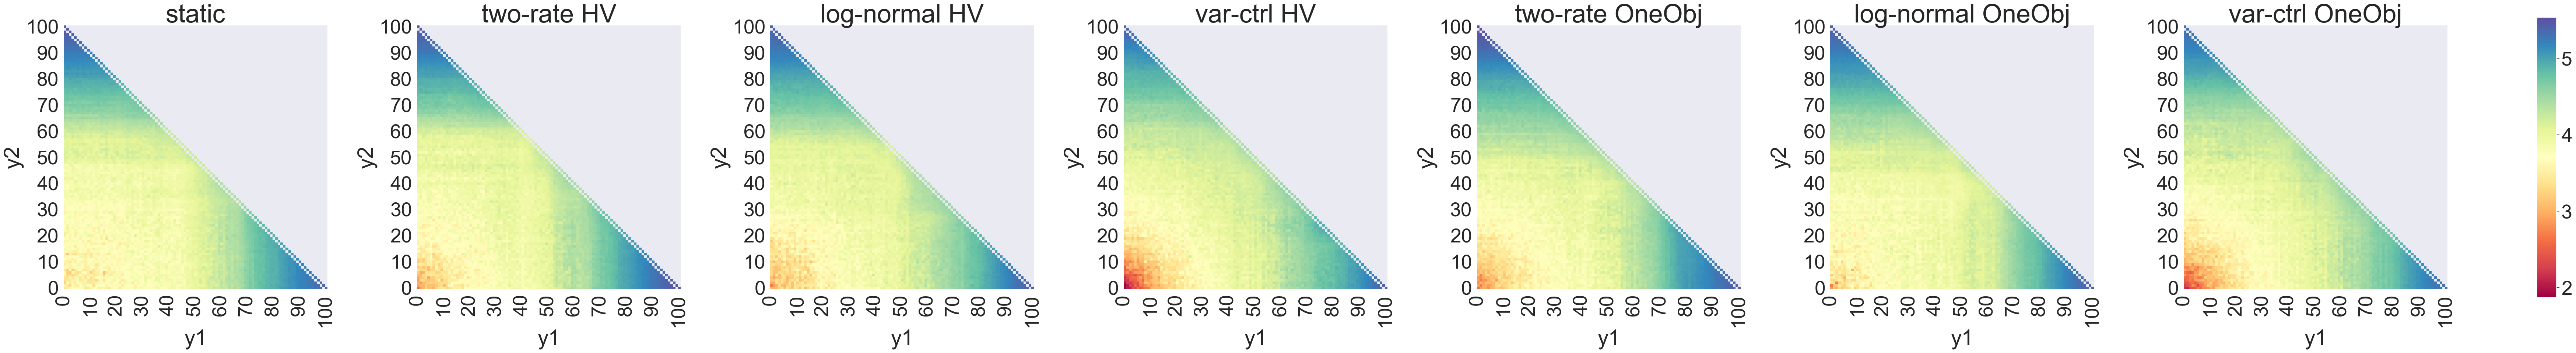

In [32]:
# dt_plot =FT_LO.loc[(FT_LO['Lambda'] == '10')]
# dt_plot1 = dt_plot.loc[dt_plot['algorithm'] == 'static']
# dt_plot1 = dt_plot1.loc[dt_plot['metric'] == 'IGD']
# dt_plot2 = dt_plot.loc[dt_plot['algorithm'] == 'normea']
# dt_plot2 = dt_plot2.loc[dt_plot['metric'] == 'IGD']
# dt_plot3 = dt_plot.loc[dt_plot['algorithm'] == 'varctrl']
# dt_plot3 = dt_plot3.loc[dt_plot['metric'] == 'IGD']
# dt_plot4 = dt_plot.loc[dt_plot['algorithm'] == 'logNormal']
# dt_plot4 = dt_plot4.loc[dt_plot['metric'] == 'IGD']
# dt_plot5 = dt_plot.loc[dt_plot['algorithm'] == 'TwoRate']
# dt_plot5 = dt_plot5.loc[dt_plot['metric'] == 'IGD']


dt_plot = FT_LO.copy()
dt_plot['ERT'] = np.log10(dt_plot['ERT'].astype(float))

sns.set_style("whitegrid")
dt_plot = dt_plot.loc[(~dt_plot['algorithm'].str.contains('normea')) & (~dt_plot['Pm'].str.contains("Self"))]
dt_plot.loc[dt_plot['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt_plot.loc[dt_plot['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt_plot.loc[dt_plot['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'
hue_order= ['static','two-rate','log-normal','var-ctrl']
sns.set(font_scale = 3.5)
fig, ax = plt.subplots(ncols=8, gridspec_kw=dict(width_ratios=[0.135,0.135,0.135,0.135,0.135,0.135,0.135,0.01]),figsize=(71,10))
# sns.set(font_scale = 2)
m1 = np.min(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'OneObj')]['ERT'])
m2 = np.min(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'HV')]['ERT'])
vmin = np.min([m1,m2])
m1 = np.max(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'OneObj')]['ERT'])
m2 = np.max(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'HV')]['ERT'])
vmax = np.max([m1,m2])
short_cols = list(range(0,101,10))
# for i in range(7):
#     ax[i].set_xticks(short_cols)
#     ax[i].set_yticks(short_cols)
#     ax[i].set_xticklabels(short_cols)
#     ax[i].set_yticklabels(short_cols)

ax[0].set_title('static',fontsize = 50)
ax[1].set_title('two-rate HV',fontsize = 50)
ax[2].set_title('log-normal HV',fontsize = 50)
ax[3].set_title('var-ctrl HV',fontsize = 50)
ax[4].set_title('two-rate OneObj',fontsize = 50)
ax[5].set_title('log-normal OneObj',fontsize = 50)
ax[6].set_title('var-ctrl OneObj',fontsize = 50)
# /yticklabels=True, 
sns_g = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'static') & (dt_plot['metric'] == 'HV')].pivot("y2", "y1", "ERT"),square=True, vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[0],cmap="Spectral")
sns_g1 = sns.heatmap(data = dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'two-rate') & (dt_plot['metric'] == 'HV') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[1],cmap="Spectral")
sns_g2 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'log-normal') & (dt_plot['metric'] == 'HV')].pivot("y2", "y1", "ERT"), square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[2],cmap="Spectral")
sns_g3 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'var-ctrl') & (dt_plot['metric'] == 'HV') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[3],cmap="Spectral")
sns_g4 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'two-rate') & (dt_plot['metric'] == 'OneObj')].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[4],cmap="Spectral")
sns_g5 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'log-normal') & (dt_plot['metric'] == 'OneObj')].pivot("y2", "y1", "ERT"), square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[5],cmap="Spectral")
sns_g6 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'var-ctrl') & (dt_plot['metric'] == 'OneObj') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[6],cmap="Spectral")
sns_g.invert_yaxis()
sns_g1.invert_yaxis()
sns_g2.invert_yaxis()
sns_g3.invert_yaxis()
sns_g4.invert_yaxis()
sns_g5.invert_yaxis()
sns_g6.invert_yaxis()
sns_g.set_xticks(short_cols)
sns_g.set_yticks(short_cols)
sns_g.set_xticklabels(short_cols)
sns_g.set_yticklabels(short_cols)
sns_g1.set_xticks(short_cols)
sns_g1.set_yticks(short_cols)
sns_g1.set_xticklabels(short_cols)
sns_g1.set_yticklabels(short_cols)
sns_g2.set_xticks(short_cols)
sns_g2.set_yticks(short_cols)
sns_g2.set_xticklabels(short_cols)
sns_g2.set_yticklabels(short_cols)  
sns_g3.set_xticks(short_cols)
sns_g3.set_yticks(short_cols)
sns_g3.set_xticklabels(short_cols)
sns_g3.set_yticklabels(short_cols)
sns_g4.set_xticks(short_cols)
sns_g4.set_yticks(short_cols)
sns_g4.set_xticklabels(short_cols)
sns_g4.set_yticklabels(short_cols)
sns_g5.set_xticks(short_cols)
sns_g5.set_yticks(short_cols)
sns_g5.set_xticklabels(short_cols)
sns_g5.set_yticklabels(short_cols)
sns_g6.set_xticks(short_cols)
sns_g6.set_yticks(short_cols)
sns_g6.set_xticklabels(short_cols)
sns_g6.set_yticklabels(short_cols)
# fig.subplots_adjust(right=0.6)
# cbar_ax = fig.add_axes([1.1, 0.15, 0.05, .77])
lo_fig = fig.colorbar(ax[0].collections[0],cax=ax[7])


plt.tight_layout()

plt.show()
# fig = plt.figure()
fig.savefig('LO-OneObj-Spectral.png', dpi=fig.dpi)

## Lambda

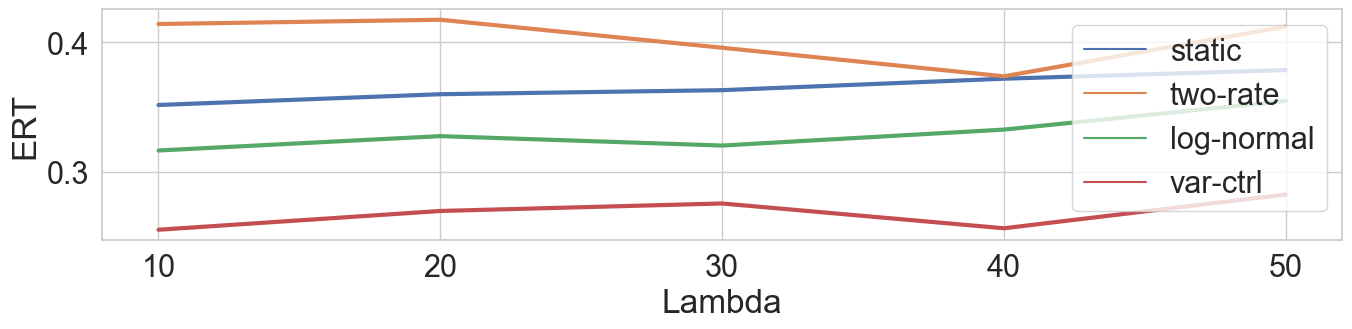

In [ ]:
# dt = ERT_table_OM.loc[ (ERT_table_OM['algorithm'] == 'TwoRate') | (ERT_table_OM['algorithm'] == 'logNormal') | (ERT_table_OM['algorithm'] == 'varctrl')]
dt = ERT_table_LO.loc[(ERT_table_LO['algorithm'] == 'static') | (ERT_table_LO['algorithm'] == 'TwoRate') | (ERT_table_LO['algorithm'] == 'logNormal') | (ERT_table_LO['algorithm'] == 'varctrl')]
dt.loc[((dt['algorithm'] == 'static') & (dt['metric'] =='HV')),'metric'] = 'OneObj'
# 
dt = dt[(dt['metric'] == 'OneObj') & (dt['Lambda'] != '2')& (dt['Lambda'] != '5') & (dt['Pm'].str.find('Self') == -1)]
dt['ERT'] = dt['ERT'].astype('float')
dt['Lambda'] = dt['Lambda'].astype('int')
# dt = dt.pivot(columns='algorithm', index='Lambda', values='ERT')
# print(dt.to_latex())
dt.loc[dt['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt.loc[dt['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt.loc[dt['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'
dt['ERT'] = np.array((dt['ERT'].astype('float')))/100/100/100
plt.figure(figsize=(16,3))

dt
hue_order= ['static','two-rate','log-normal','var-ctrl']
# # fig, ax = plt.subplots(ncol=1,figsize=(10,4))
lom = sns.lineplot(data=dt, x = 'Lambda', y = 'ERT',linewidth =3, hue = 'algorithm', markers = True, hue_order=hue_order)
sns.set(font_scale = 2)
lom.set_xticks([10,20,30,40,50])
sns.set_style("whitegrid")
# plt.yscale('log')
plt.legend(loc='upper right')
plt.show()
lom = lom.get_figure()
lom.savefig('LO-Obj-lambda.png')

## Read Adaptive Mutation Rate

In [ ]:
metric_dict = {1: 'HV', 2:'IGD', 3:'NUM', 4:'OneObj%10', 5:'OneObj%50', 6:'OneObj'}
algorithm_dict = {'varctrl': 'var-ctrl', 'normea': 'normea', 'logNormal': 'log-normal', 'TwoRate': 'two-rate'}
def get_mutation_rate_selfadaptation(file_name):
    info = file_name[:-4]
    info = info.split('-')

    Lambda = int(info[2][1:])
    metric = int(info[3][1:])
    algorithm = info[1]

    MR =  pd.DataFrame()
    with open(os.path.join("/Users/fye/Codes/Git/GSEMO/MR/lo", file_name)) as f:
        run = 0
        pause = False
        mr_runs = []
        for line in f:
            if line[0] == '{':
                pause = True
    #             print()
                MR = pd.concat([MR, pd.DataFrame(mr_runs,columns=['run'+str(run)])],axis = 1)
                mr_runs = []
                run += 1

                MR['Lambda'] = Lambda
                MR['metric'] = metric_dict[metric]
                MR['algorithm'] = algorithm_dict[algorithm]
                MR['index1'] = MR.index.copy()
                return MR

                continue
            if line[0] == ')':
                pause = False
                continue
            if not pause:
                value = line.strip()
                if (algorithm == 'varctrl'):
                    value = value.split(' ')[0]
                    value = float(value)/100.0
                if (algorithm == 'TwoRate'):
                    value = float(value)/100.0
                mr_runs.append(float(value))
         


In [ ]:
path_LO_MR = '/Users/fye/Codes/Git/GSEMO/MR/lo'
files = os.listdir(path_LO_MR)
columns = ['Lambda', 'metric','algorithm', 'index1','run0']
MR_LO = pd.DataFrame([],columns = columns)
for f in files:
    MR_LO = pd.concat([MR_LO,get_mutation_rate_selfadaptation(os.path.join(path_LO_MR,f))], ignore_index=True)
# MR_OM


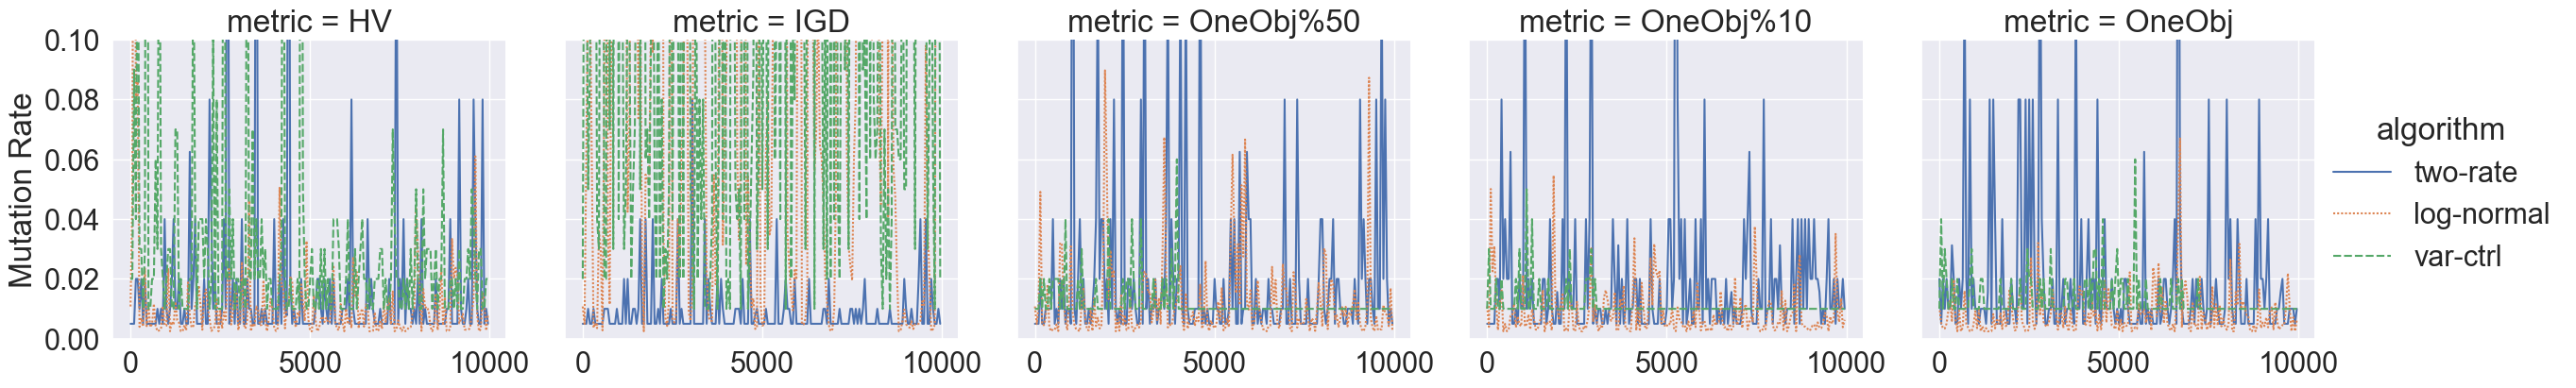

In [ ]:

dt_plot = MR_LO.copy()
dt_plot = dt_plot.loc[~dt_plot['algorithm'].str.contains('normea')]
dt_plot = dt_plot.loc[(dt_plot['Lambda']==10) & (dt_plot['index1'] < 10000) & (dt_plot['index1'] % 50 == 0)]
dt_plot

hue_order= ['two-rate','log-normal','var-ctrl']
col_order = ['HV', 'IGD', 'OneObj%50','OneObj%10', 'OneObj']
lo_mr = sns.relplot(data=dt_plot, x="index1", y="run0",hue_order = hue_order,col_order =col_order, hue="algorithm", style="algorithm",col="metric", kind = 'line')
sns.set(font_scale = 2)
plt.ylim(0, 0.1)
lo_mr.set(xlabel=None)
lo_mr.set(ylabel='Mutation Rate')
plt.show()
lo_mr.savefig("lo_mr.png") 

## Regarding Lambda

In [ ]:
dt = ERT_table_LO.loc[(ERT_table_LO['algorithm'] == 'static') | (ERT_table_LO['algorithm'] == 'TwoRate') | (ERT_table_LO['algorithm'] == 'logNormal') | (ERT_table_LO['algorithm'] == 'varctrl')]
dt = dt[dt['metric'] == 'OneObj']
dt = dt.pivot(index='algorithm', columns='Lambda', values='ERT')
# print(dt.to_latex())
dt

Lambda,10,20,30,40,50
algorithm,,,,,
TwoRate,414197.842105,417476.105263,395865.263158,373815.631579,412177.526316
logNormal,316528.894737,327631.157895,320359.736842,332664.000000,354799.421053
varctrl,255346.000000,269841.842105,275631.473684,256485.263158,282548.315789


# COCZ
## Reading Runtime Files

In [16]:
path_COCZ = "/Users/fye/Codes/Git/GSEMO/csv/cocz"

alg_options = ['varctrl','static','normea','TwoRate','logNormal','OBJAdapt','AGSEMO','AGSEO']
metric_options = ['HV','IGD', 'OneObj%10','OneObj%50']
def extract_algorithm_info(algorithm_tag):
    for alg in alg_options:
        if algorithm_tag.find(alg) != -1:
            algorithm = alg
            algorithm_tag = algorithm_tag.replace(alg,'')
            break
    found_metric = False
    for m in metric_options:
        if algorithm_tag.find(m) != -1:
            metric = m
            algorithm_tag = algorithm_tag.replace(m,'')
            found_metric = True
    if not found_metric:
        metric = 'OneObj'
        algorithm_tag = algorithm_tag.replace(metric,'')
    algorithm_tag = algorithm_tag[1:]
    algorithm_tag = algorithm_tag.split('P')
    Lambda = algorithm_tag[0]
    Pm = algorithm_tag[1]
    return algorithm, metric, Lambda, Pm

def pareto_txt_1(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[0]

def pareto_txt_2(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[1]



def get_ert_cocz(file):
    rawdata = pd.read_csv(file)

    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))
    rawdata = rawdata.loc[(rawdata['y1'] >= 50) & (rawdata['y2']  + rawdata['y1'] == 150)]
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    ert = (np.sum(runtime) + 1000000 * (100 - success)) / 100
    return success/ 100.0, ert, np.var(runtime)

def get_rt_cocz(file):
    rawdata = pd.read_csv(file)

    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))
    rawdata = rawdata.loc[(rawdata['y1'] >= 50) & (rawdata['y2']  + rawdata['y1'] == 150)]
    success = 0
    runtime = []
    for i in range(100):
        if not (False in rawdata['found'+str(i)]):
            success += 1
            runtime.append(max(rawdata['First_hit'+str(i)]))
    return runtime

In [ ]:
files = os.listdir(path_COCZ)
# files = ['/Users/fye/Codes/Git/GSEMO/staticL1P1NUMCOCZD100.csv']
ERT_table_COCZ = []
for f in files:
    # print(f)
    line = list(extract_algorithm_info(f[:-12]))
    line.extend(list(get_ert_cocz(os.path.join(path_COCZ,f))))
    ERT_table_COCZ.append(line)
ERT_table_COCZ = pd.DataFrame(ERT_table_COCZ,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_COCZ

,algorithm,metric,Lambda,Pm,ps,ERT,var
0,static,OneObj,50,1,1.0,30576.66,1.236654e+08
1,TwoRate,OneObj,20,1,1.0,38030.81,1.830506e+08
2,TwoRate,OneObj%10,20,1,1.0,36954.73,1.869737e+08
3,TwoRate,HV,10,1,1.0,26920.61,1.130827e+08
4,logNormal,OneObj%50,20,1,1.0,29010.46,1.007930e+08
5,varctrl,OneObj%10,40,1,1.0,34825.75,1.065119e+08
6,varctrl,IGD,30,1,1.0,98299.56,1.197812e+09
7,varctrl,OneObj,20,1,1.0,42278.79,2.072585e+08
8,static,OneObj%50,20,1,1.0,30680.69,1.364771e+08
9,TwoRate,OneObj%50,40,1,1.0,33255.84,1.219815e+08


In [ ]:
dt = ERT_table_COCZ.loc[(ERT_table_COCZ['Lambda'] == '10')]
dt['ERT'].astype('float')
dt = dt.pivot(index='algorithm', columns='metric', values='ERT')
print(dt.to_latex(float_format="{:0.0f}".format))
# dt

\begin{tabular}{lrrrrr}
\toprule
metric &    HV &    IGD &  OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &       &        &         &            &            \\
\midrule
TwoRate   & 26921 &  27036 &   38327 &      41654 &      40129 \\
logNormal & 31043 &  66068 &   32029 &      31855 &      31248 \\
static    & 30049 &  30049 &   30049 &      30049 &      30049 \\
varctrl   & 46091 & 109648 &   48414 &      50671 &      49310 \\
\bottomrule
\end{tabular}



In [ ]:
dt = ERT_table_COCZ.loc[(ERT_table_COCZ['Lambda'] == '10')]
dt['var'].astype('float')
dt = dt.pivot(index='algorithm', columns='metric', values='var')
print(dt.to_latex(float_format="{:.3e}".format))
# dt

\begin{tabular}{lrrrrr}
\toprule
metric &        HV &       IGD &    OneObj &  OneObj\%10 &  OneObj\%50 \\
algorithm &           &           &           &            &            \\
\midrule
TwoRate   & 1.131e+08 & 6.336e+07 & 1.659e+08 &  1.467e+08 &  2.018e+08 \\
logNormal & 1.216e+08 & 7.427e+08 & 2.048e+08 &  1.525e+08 &  1.052e+08 \\
static    & 1.217e+08 & 1.217e+08 & 1.217e+08 &  1.217e+08 &  1.217e+08 \\
varctrl   & 2.251e+08 & 1.535e+09 & 3.518e+08 &  3.223e+08 &  4.444e+08 \\
\bottomrule
\end{tabular}



## PLot Convergence

In [9]:
def pareto_txt_1(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[0]

def pareto_txt_2(txt):
    y = txt.split(' ')
    y[0] = int(y[0])
    y[1] = int(y[1])
    return y[1]

def get_fixed_target_cocz(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1', 'y2']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):
        if i < 50:
            for j in range(51 + i):
                t = rawdata[(rawdata['y1'] == i) & (rawdata['y2'] == j)]
                result = []
                for h in range(100):
                    tt = t['First_hit' + str(h)].values[0]
                    if tt != -1:
                        result.append(tt)
#                     else:
#                         result.append(5000000)
                col = list(extract_algorithm_info(rawdata['algorithm'][0]))
                col.extend([len(result)/100.0, np.mean(result), np.var(result), i, j])
                fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
        else:
            for j in range(i-50, 151 - i):
                t = rawdata[(rawdata['y1'] == i) & (rawdata['y2'] == j)]
                result = []
                for h in range(100):
                    tt = t['First_hit' + str(h)].values[0]
                    if tt != -1:
                        result.append(tt)
#                     else:
#                         result.append(5000000)
                col = list(extract_algorithm_info(rawdata['algorithm'][0]))
                col.extend([len(result)/100.0, np.mean(result), np.var(result), i, j])
                fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target

def get_fixed_target_cocz_y1(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):       
        t = rawdata.loc[rawdata['y1'] == i]
        result = []
        for h in range(100):
            t.loc[t['First_hit'+ str(h)]== -1, 'First_hit'+ str(h)] = 5000000
            tt = np.min(t['First_hit' + str(h)].values)
            if tt != -1:
                result.append(tt)
            else:
                result.append(5000000)
        col = list(extract_algorithm_info(rawdata['algorithm'][0]))
        col.extend([len(result)/100.0, np.mean(result), np.var(result), i])
        fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target

def get_fixed_target_cocz_y2(file):
    rawdata = pd.read_csv(file)
    rawdata['y1'] = rawdata['pareto'].apply(lambda x: pareto_txt_1(x))
    rawdata['y2'] = rawdata['pareto'].apply(lambda x: pareto_txt_2(x))

    columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y2']
    info = list(extract_algorithm_info(rawdata['algorithm'][0]))
    fixed_target = pd.DataFrame([],columns = columns)
    for i in range(101):       
        t = rawdata.loc[rawdata['y2'] == i]
        result = []
        for h in range(100):
            t.loc[t['First_hit'+ str(h)]== -1, 'First_hit'+ str(h)] = 5000000
            tt = np.min(t['First_hit' + str(h)].values)
            if tt != -1:
                result.append(tt)
            else:
                result.append(5000000)
        col = list(extract_algorithm_info(rawdata['algorithm'][0]))
        col.extend([len(result)/100.0, np.mean(result), np.var(result), i])
        fixed_target = fixed_target.append(pd.DataFrame([col],columns = columns))
    return fixed_target


In [40]:
files = os.listdir(path_COCZ)

columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var', 'y1', 'y2']
FT_COCZ = pd.DataFrame([],columns = columns)
for f in files:
    if (f.find("L10") == -1) or (f.find("IGD") != -1) or (f.find("Self")!= -1) or (f.find("NUM") != -1) or (f.find('%') != -1) :
        continue
    print(f)
    FT_COCZ = FT_COCZ.append(get_fixed_target_cocz(os.path.join(path_COCZ,f)))
FT_COCZ

TwoRateL10P1HVCOCZD100.csv
staticL10P1HVCOCZD100.csv
staticL10P1OneObjCOCZD100.csv
logNormalL10P1OneObjCOCZD100.csv
logNormalL10P1HVCOCZD100.csv
varctrlL10P1OneObjCOCZD100.csv
TwoRateL10P1OneObjCOCZD100.csv
varctrlL10P1HVCOCZD100.csv


,algorithm,metric,Lambda,Pm,ps,ERT,var,y1,y2
0,TwoRate,HV,10,1,0.00,NaN,NaN,0,0
0,TwoRate,HV,10,1,0.00,NaN,NaN,0,1
0,TwoRate,HV,10,1,0.00,NaN,NaN,0,2
0,TwoRate,HV,10,1,0.00,NaN,NaN,0,3
0,TwoRate,HV,10,1,0.00,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...
0,varctrl,HV,10,1,1.00,17954.720000,4.339914e+07,98,52
0,varctrl,HV,10,1,0.72,31431.222222,2.161276e+08,99,49
0,varctrl,HV,10,1,0.00,NaN,NaN,99,50
0,varctrl,HV,10,1,1.00,24846.770000,9.452432e+07,99,51


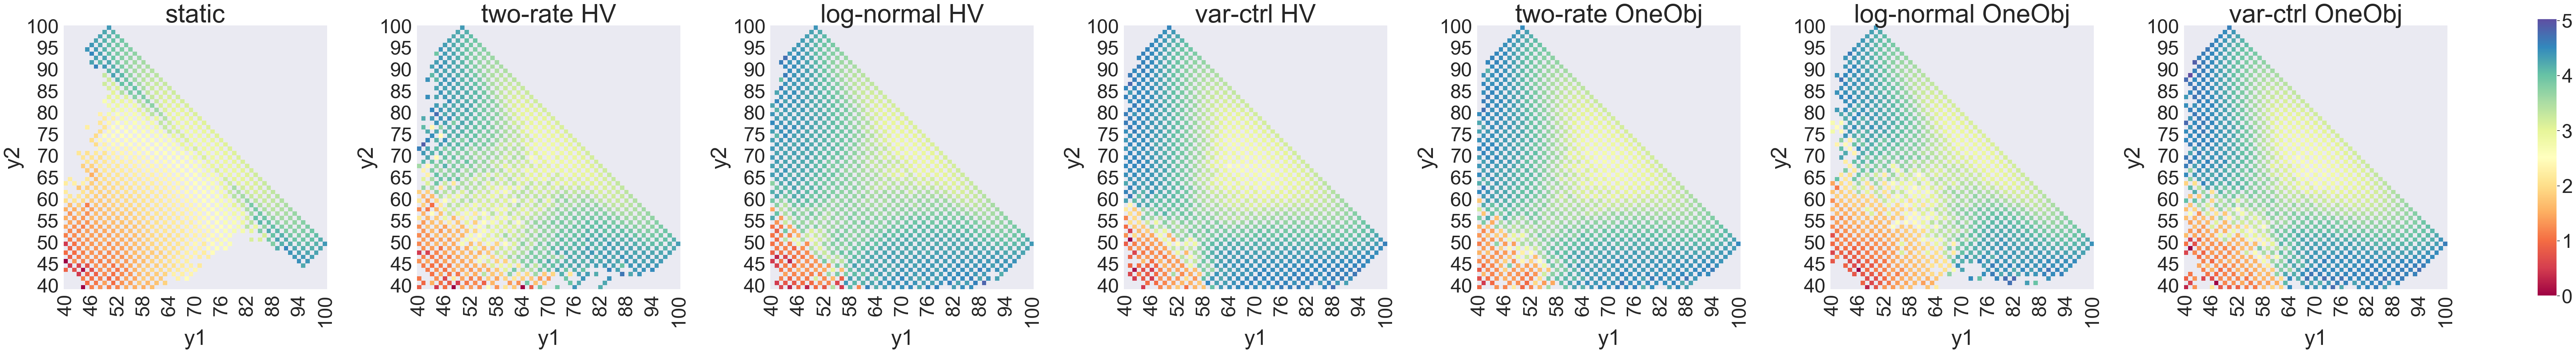

In [42]:

dt_plot = FT_COCZ.copy()
dt_plot['ERT'] = np.log10(dt_plot['ERT'].astype(float))

sns.set_style("whitegrid")
dt_plot = dt_plot[~dt_plot['algorithm'].str.contains('normea')]
dt_plot = dt_plot[~dt_plot['algorithm'].str.contains('Self')]
dt_plot = dt_plot[(dt_plot['y1'] >= 40) & (dt_plot['y2'] >=40)]
dt_plot.loc[dt_plot['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt_plot.loc[dt_plot['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt_plot.loc[dt_plot['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'
hue_order= ['static','two-rate','log-normal','var-ctrl']
sns.set(font_scale = 3.5)
fig, ax = plt.subplots(ncols=8, gridspec_kw=dict(width_ratios=[0.135,0.135,0.135,0.135,0.135,0.135,0.135,0.01]),figsize=(71,10))

m1 = np.min(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'OneObj')]['ERT'])
m2 = np.min(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'HV')]['ERT'])
vmin = np.min([m1,m2])
m1 = np.max(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'OneObj')]['ERT'])
m2 = np.max(dt_plot.loc[(dt_plot['Lambda']=='10') & (dt_plot['metric'] == 'HV')]['ERT'])
vmax = np.max([m1,m2])
short_cols = list(range(40,101,10))
for i in range(7):
    ax[i].set_xlim(40,100)
    ax[i].set_ylim(40,100)

ax[0].set_title('static',fontsize = 50)
ax[1].set_title('two-rate HV',fontsize = 50)
ax[2].set_title('log-normal HV',fontsize = 50)
ax[3].set_title('var-ctrl HV',fontsize = 50)
ax[4].set_title('two-rate OneObj',fontsize = 50)
ax[5].set_title('log-normal OneObj',fontsize = 50)
ax[6].set_title('var-ctrl OneObj',fontsize = 50)
# /yticklabels=True, 
sns_g = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'static') & (dt_plot['metric'] == 'HV')].pivot("y2", "y1", "ERT"),square=True, vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[0],cmap="Spectral")
sns_g1 = sns.heatmap(data = dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'two-rate') & (dt_plot['metric'] == 'HV') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[1],cmap="Spectral")
sns_g2 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'log-normal') & (dt_plot['metric'] == 'HV')].pivot("y2", "y1", "ERT"), square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[2],cmap="Spectral")
sns_g3 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'var-ctrl') & (dt_plot['metric'] == 'HV') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[3],cmap="Spectral")
sns_g4 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'two-rate') & (dt_plot['metric'] == 'OneObj')].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[4],cmap="Spectral")
sns_g5 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'log-normal') & (dt_plot['metric'] == 'OneObj')].pivot("y2", "y1", "ERT"), square=True,vmin = vmin, vmax = vmax, annot=False, cbar=False, ax=ax[5],cmap="Spectral")
sns_g6 = sns.heatmap(data =dt_plot[(dt_plot['Lambda']=='10') &  (dt_plot['algorithm'] == 'var-ctrl') & (dt_plot['metric'] == 'OneObj') ].pivot("y2", "y1", "ERT"),square=True,vmin = vmin, vmax = vmax,  annot=False, cbar=False, ax=ax[6],cmap="Spectral")
sns_g.invert_yaxis()
sns_g1.invert_yaxis()
sns_g2.invert_yaxis()
sns_g3.invert_yaxis()
sns_g4.invert_yaxis()
sns_g5.invert_yaxis()
sns_g6.invert_yaxis()
# sns_g.set_xticks(short_cols)
# sns_g.set_yticks(short_cols)
# sns_g.set_xticklabels(short_cols)
# sns_g.set_yticklabels(short_cols)
# sns_g.set_xlim(40,100)
# sns_g.set_ylim(40,100)
# sns_g1.set_xticks(short_cols)
# sns_g1.set_yticks(short_cols)
# sns_g1.set_xticklabels(short_cols)
# sns_g1.set_yticklabels(short_cols)
# sns_g2.set_xticks(short_cols)
# sns_g2.set_yticks(short_cols)
# sns_g2.set_xticklabels(short_cols)
# sns_g2.set_yticklabels(short_cols)  
# sns_g3.set_xticks(short_cols)
# sns_g3.set_yticks(short_cols)
# sns_g3.set_xticklabels(short_cols)
# sns_g3.set_yticklabels(short_cols)
# sns_g4.set_xticks(short_cols)
# sns_g4.set_yticks(short_cols)
# sns_g4.set_xticklabels(short_cols)
# sns_g4.set_yticklabels(short_cols)
# sns_g5.set_xticks(short_cols)
# sns_g5.set_yticks(short_cols)
# sns_g5.set_xticklabels(short_cols)
# sns_g5.set_yticklabels(short_cols)
# sns_g6.set_xticks(short_cols)
# sns_g6.set_yticks(short_cols)
# sns_g6.set_xticklabels(short_cols)
# sns_g6.set_yticklabels(short_cols)
# fig.subplots_adjust(right=0.6)
# cbar_ax = fig.add_axes([1.1, 0.15, 0.05, .77])
lo_fig = fig.colorbar(ax[0].collections[0],cax=ax[7])


plt.tight_layout()

plt.show()
# fig = plt.figure()
fig.savefig('COCZ-OneObj-Spectral.png', dpi=fig.dpi)

## Adaptive Mutation Rate

In [ ]:
metric_dict = {1: 'HV', 2:'IGD', 3:'NUM', 4:'OneObj%10', 5:'OneObj%50', 6:'OneObj'}
algorithm_dict = {'varctrl': 'var-ctrl', 'normea': 'normea', 'logNormal': 'log-normal', 'TwoRate': 'two-rate'}
def get_mutation_rate_selfadaptation(file_name):
    info = file_name[:-4]
    info = info.split('-')

    Lambda = int(info[2][1:])
    metric = int(info[3][1:])
    algorithm = info[1]

    MR =  pd.DataFrame()
    with open(os.path.join("/Users/fye/Codes/Git/GSEMO/MR/cocz", file_name)) as f:
        run = 0
        pause = False
        mr_runs = []
        for line in f:
            if line[0] == '{':
                pause = True
    #             print()
                MR = pd.concat([MR, pd.DataFrame(mr_runs,columns=['run'+str(run)])],axis = 1)
                mr_runs = []
                run += 1

                MR['Lambda'] = Lambda
                MR['metric'] = metric_dict[metric]
                MR['algorithm'] = algorithm_dict[algorithm]
                MR['index1'] = MR.index.copy()
                return MR

                continue
            if line[0] == ')':
                pause = False
                continue
            if not pause:
                value = line.strip()
                if (algorithm == 'varctrl'):
                    value = value.split(' ')[0]
                    value = float(value)/100.0
                if (algorithm == 'TwoRate'):
                    value = float(value)/100.0
                mr_runs.append(float(value))
         


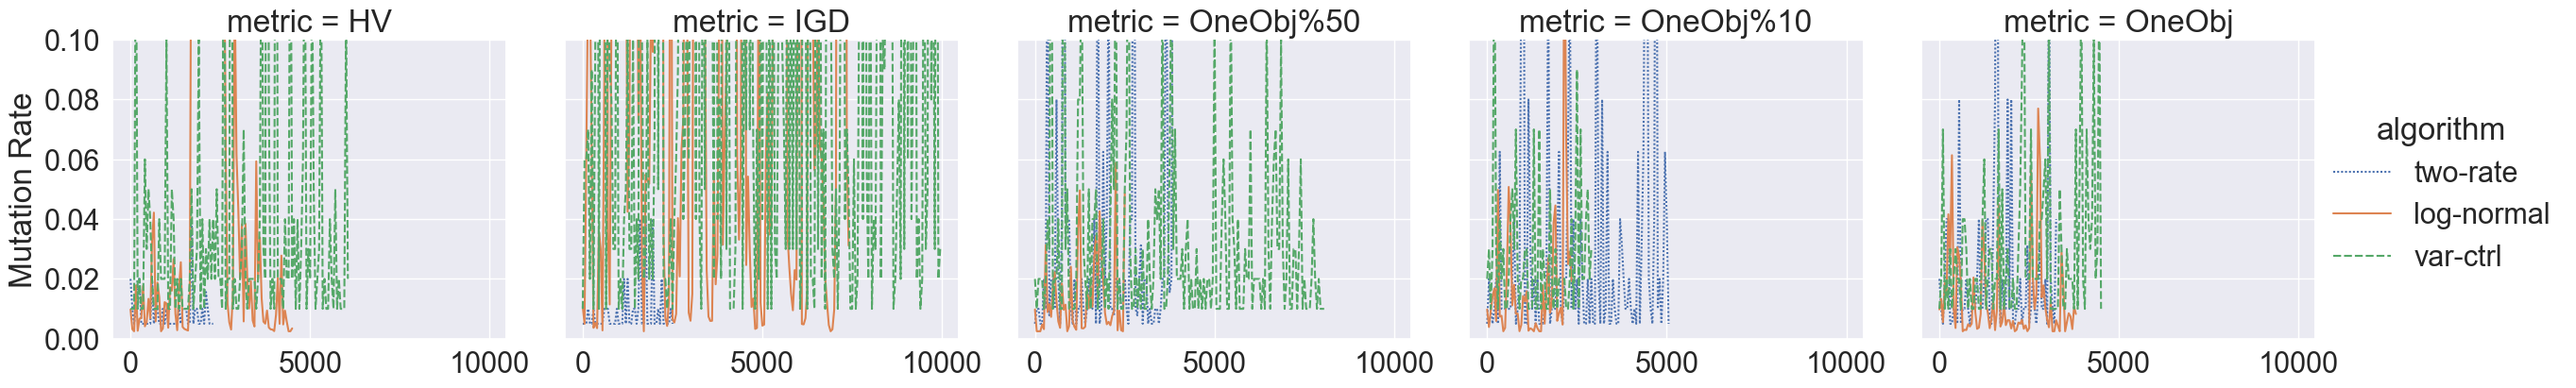

In [ ]:
path_COCZ_MR = '/Users/fye/Codes/Git/GSEMO/MR/cocz'
files = os.listdir(path_COCZ_MR)
columns = ['Lambda', 'metric','algorithm', 'index1','run0']
MR_COCZ = pd.DataFrame([],columns = columns)
for f in files:
    MR_COCZ = pd.concat([MR_COCZ,get_mutation_rate_selfadaptation(os.path.join(path_COCZ_MR,f))], ignore_index=True)
# MR_OM

dt_plot = MR_COCZ.copy()
dt_plot = dt_plot.loc[~dt_plot['algorithm'].str.contains('normea')]
dt_plot.loc[dt_plot['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt_plot.loc[dt_plot['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt_plot.loc[dt_plot['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'
dt_plot = dt_plot.loc[(dt_plot['Lambda']==10) & (dt_plot['index1'] < 10000) & (dt_plot['index1'] % 50 == 0)]
dt_plot

hue_order= ['two-rate','log-normal','var-ctrl']
col_order = ['HV', 'IGD','OneObj%50','OneObj%10', 'OneObj']
lo_mr = sns.relplot(data=dt_plot, x="index1", y="run0",hue_order = hue_order,col_order =col_order, hue="algorithm", style="algorithm",col="metric", kind = 'line')
sns.set(font_scale = 2)
lo_mr.set(xlabel=None)
# plt.yscale('log')
plt.ylim(0, 0.1)
lo_mr.set(ylabel='Mutation Rate')
plt.show()
lo_mr.savefig("cocz_mr.png") 

## Lambda

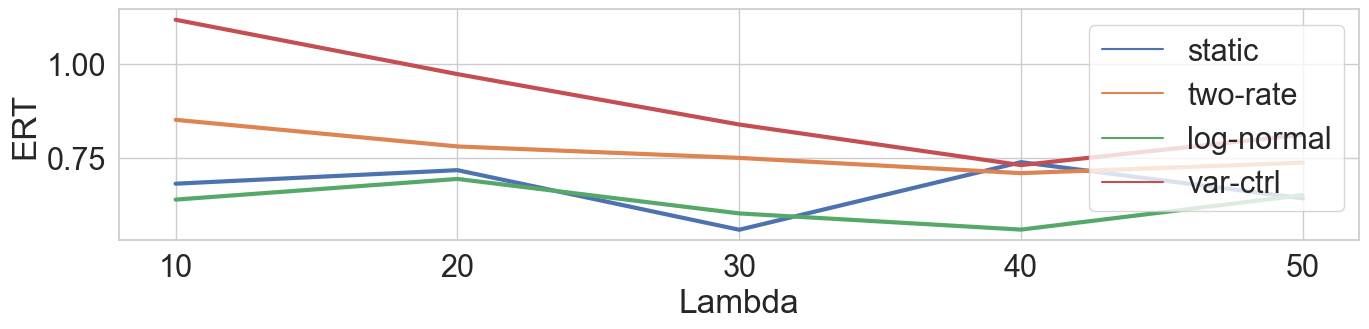

In [ ]:
# dt = ERT_table_OM.loc[ (ERT_table_OM['algorithm'] == 'TwoRate') | (ERT_table_OM['algorithm'] == 'logNormal') | (ERT_table_OM['algorithm'] == 'varctrl')]
dt = ERT_table_COCZ.loc[(ERT_table_COCZ['algorithm'] == 'static') | (ERT_table_COCZ['algorithm'] == 'TwoRate') | (ERT_table_COCZ['algorithm'] == 'logNormal') | (ERT_table_COCZ['algorithm'] == 'varctrl')]
dt.loc[((dt['algorithm'] == 'static') & (dt['metric'] =='HV')),'metric'] = 'OneObj'
# 
dt = dt[(dt['metric'] == 'OneObj') & (dt['Lambda'] != '1')& (dt['Lambda'] != '2')& (dt['Lambda'] != '5') & (dt['Pm'].str.find('Self') == -1)]
dt['ERT'] = dt['ERT'].astype('float')
dt['Lambda'] = dt['Lambda'].astype('int')
# dt = dt.pivot(columns='algorithm', index='Lambda', values='ERT')
# print(dt.to_latex())
dt.loc[dt['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
dt.loc[dt['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
dt.loc[dt['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'

plt.figure(figsize=(16,3))
dt['ERT'] = np.array((dt['ERT'].astype('float')))/100/100/np.log([100])[0]
hue_order= ['static','two-rate','log-normal','var-ctrl']
# # fig, ax = plt.subplots(ncol=1,figsize=(10,4))
sns.set(font_scale = 2)
sns.set_style("whitegrid")
fig = sns.lineplot(data=dt, x = 'Lambda', y = 'ERT',linewidth =3, hue = 'algorithm', markers = True, hue_order=hue_order)

fig.set_xticks([10,20,30,40,50])

# plt.yscale('log')
plt.legend(loc='upper right')
plt.show()
fig = fig.get_figure()
fig.savefig('COCZ-Obj-lambda.png')

# AGSEMO

In [140]:
path_OM_AGSEMO = "/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/om/"
files = os.listdir(path_OM_AGSEMO)
ERT_table_OM = []
for f in files:
    line = list(extract_algorithm_info(f[:-14]))
    line.extend(list(get_ert(os.path.join(path_OM_AGSEMO,f))))
    ERT_table_OM.append(line)
ERT_table_OM = pd.DataFrame(ERT_table_OM,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_OM

,algorithm,metric,Lambda,Pm,ps,ERT,var
0,static,HV,50,1,1.0,65200.32,4.928085e+08
1,AGSEMO,OneObj,30,1,1.0,64225.70,3.291139e+08
2,AGSEMO,OneObj,20,1,1.0,64439.53,4.023093e+08
3,AGSEMO,OneObj,1,1,1.0,60595.16,4.865561e+08
4,static,HV,30,1,1.0,66145.64,3.499760e+08
5,AGSEMO,OneObj,50,1,1.0,62312.66,3.423940e+08
6,static,HV,20,1,1.0,63862.31,3.784570e+08
7,AGSEMO,OneObj,10,1,1.0,61617.68,2.937769e+08
8,static,HV,10,1,1.0,68374.99,4.207598e+08
9,static,HV,1,1,1.0,65755.93,4.281525e+08


In [139]:
path_LO_AGSEMO = "/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/lo/"
files = os.listdir(path_LO_AGSEMO)
# files = ["/Users/fye/Codes/Git/GSEMO/staticL1P1NUMLeadingOnesD100.csv"]
ERT_table_LO = []
for f in files:
    print(f)
    line = list(extract_algorithm_info(f[:-19]))
    line.extend(list(get_ert_lo(os.path.join(path_LO_AGSEMO,f))))
    ERT_table_LO.append(line)
ERT_table_LO = pd.DataFrame(ERT_table_LO,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_LO

AGSEMOL50P1LeadingOnesD100.csv
staticL40P1HVLeadingOnesD100.csv
staticL1P1HVLeadingOnesD100.csv
AGSEMOL30P1LeadingOnesD100.csv
AGSEMOL10P1LeadingOnesD100.csv
staticL30P1HVLeadingOnesD100.csv
staticL50P1HVLeadingOnesD100.csv
AGSEMOL40P1LeadingOnesD100.csv
staticL10P1HVLeadingOnesD100.csv
AGSEMOL20P1LeadingOnesD100.csv
staticL20P1HVLeadingOnesD100.csv
AGSEMOL1P1LeadingOnesD100.csv


,algorithm,metric,Lambda,Pm,ps,ERT,var
0,AGSEMO,OneObj,50,1,1.0,318008.61,4.834602e+09
1,static,HV,40,1,1.0,358163.61,6.520157e+09
2,static,HV,1,1,1.0,341690.44,6.762108e+09
3,AGSEMO,OneObj,30,1,1.0,309712.08,6.398353e+09
4,AGSEMO,OneObj,10,1,1.0,314000.03,6.364992e+09
5,static,HV,30,1,1.0,346891.48,5.680203e+09
6,static,HV,50,1,1.0,349384.36,8.530269e+09
7,AGSEMO,OneObj,40,1,1.0,335935.84,6.959132e+09
8,static,HV,10,1,1.0,340072.44,5.945627e+09
9,AGSEMO,OneObj,20,1,1.0,333608.54,6.131587e+09


In [138]:
path_COCZ_AGSEMO = "/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/cocz/"
files = os.listdir(path_COCZ_AGSEMO)
ERT_table_COCZ = []
for f in files:
    print(f)
    line = list(extract_algorithm_info(f[:-12]))
    line.extend(list(get_ert_cocz(os.path.join(path_COCZ_AGSEMO,f))))
    ERT_table_COCZ.append(line)
ERT_table_COCZ = pd.DataFrame(ERT_table_COCZ,columns = ['algorithm', 'metric','Lambda', 'Pm','ps','ERT', 'var'])
ERT_table_COCZ

staticL40P1HVCOCZD100.csv
staticL10P1HVCOCZD100.csv
staticL1P1HVCOCZD100.csv
staticL50P1HVCOCZD100.csv
AGSEMOL10P1COCZD100.csv
staticL20P1HVCOCZD100.csv
AGSEMOL1P1COCZD100.csv
AGSEMOL20P1COCZD100.csv
AGSEMOL50P1COCZD100.csv
staticL30P1HVCOCZD100.csv
AGSEMOL40P1COCZD100.csv
AGSEMOL30P1COCZD100.csv


,algorithm,metric,Lambda,Pm,ps,ERT,var
0,static,HV,40,1,1.0,29682.86,9.907781e+07
1,static,HV,10,1,1.0,30048.88,1.216951e+08
2,static,HV,1,1,1.0,29773.94,1.294892e+08
3,static,HV,50,1,1.0,30576.66,1.236654e+08
4,AGSEMO,OneObj,10,1,1.0,26843.80,8.252856e+07
5,static,HV,20,1,1.0,30680.69,1.364771e+08
6,AGSEMO,OneObj,1,1,1.0,28200.60,1.221823e+08
7,AGSEMO,OneObj,20,1,1.0,27436.92,1.144192e+08
8,AGSEMO,OneObj,50,1,1.0,28772.65,7.588475e+07
9,static,HV,30,1,1.0,29401.69,1.015133e+08


# GET P values

In [134]:
lo_rt1 = get_rt_lo("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/lo/AGSEMOL10P1LeadingOnesD100.csv")
lo_rt2 = get_rt_lo("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/lo/staticL1P1HVLeadingOnesD100.csv")
print(stats.mannwhitneyu(lo_rt1, lo_rt2))
get_ert_lo("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/lo/AGSEMOL10P1LeadingOnesD100.csv")

MannwhitneyuResult(statistic=3998.0, pvalue=0.014402926998394898)


(1.0, 314000.03, 6364992145.869099)

In [136]:
om_rt1 = get_rt("/Users/fye/Codes/Git/GSEMO//csv/AGSEMO/om/AGSEMOL10P1OneMaxD100.csv")
om_rt2 = get_rt("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/om/staticL10P1HVOneMaxD100.csv")
print(stats.mannwhitneyu(om_rt1, om_rt2))
get_ert("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/om/AGSEMOL10P1OneMaxD100.csv")

MannwhitneyuResult(statistic=4043.0, pvalue=0.01943390857842529)


(1.0, 61617.68, 293776858.2776)

In [137]:
cocz_rt1 = get_rt_cocz("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/cocz/AGSEMOL10P1COCZD100.csv")
cocz_rt2 = get_rt_cocz("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/cocz/staticL10P1HVCOCZD100.csv")
print(print(stats.mannwhitneyu(cocz_rt1, cocz_rt2)))
get_ert_cocz("/Users/fye/Codes/Git/GSEMO/csv/AGSEMO/cocz/AGSEMOL10P1COCZD100.csv")

MannwhitneyuResult(statistic=4127.0, pvalue=0.033018620202176066)
None


(1.0, 26843.8, 82528560.33999999)

# Making Metric Figures

In [142]:
def get_PF(pf,y1,y2):
    for i in range(len(pf)):
        if (pf['y1'][i] >= y1) & (pf['y2'][i] >= y2) :
            return pf
        if (pf['y1'][i] < y1) & (pf['y2'][i] < y2) :
            pf.iloc[i,pf.columns.get_loc('y1')] = y1
            pf.iloc[i,pf.columns.get_loc('y2')] = y2
    pf = pf.append(pd.DataFrame([[y1,y2]],columns=['y1','y2']))
    pf = pf.drop_duplicates()
    pf = pf.sort_values(by=['y1','y2']).reset_index(drop=True)
    return pf

def HV(dt):
    y1_ref = -1
    y2_ref = -1
    result = 0
    for i in range(len(dt)):
        result += ((dt.iloc[i]['y1'] - y1_ref) * (dt.iloc[i]['y2'] - y2_ref))
        y1_ref = dt.iloc[i]['y1']
    return result

def NUM_PF(dt,id):
    if (id == 1):
        tmp = dt[(dt['y1'] + dt['y2']) == 100]
    if (id == 2):
        tmp = dt[(dt['y1'] + dt['y2']) == 100]
    if (id == 4):
        tmp = dt[(dt['y1'] >= 50) & (dt['y1'] + dt['y2'] == 150)]
    return len(tmp)

['static', 'HV', '10', '1']
['logNormal', 'HV', '10', '1']
['varctrl', 'HV', '10', '1']
['TwoRate', 'HV', '10', '1']
['AGSEMO', 'OneObj', '10', '1']


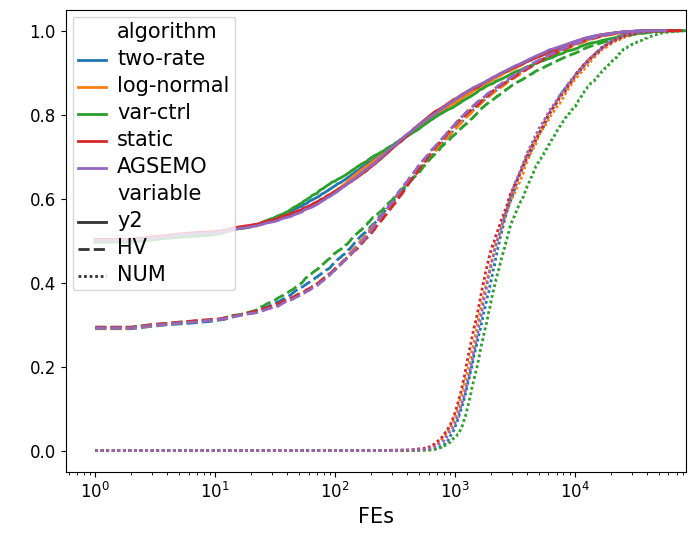

In [161]:
import itertools
import matplotlib.ticker as ticker

path = '/Users/fye/Codes/Git/GSEMO/metric/AGSEMO/cocz'
problem = 'COCZ'
e = "AGSEMO" 
files = os.listdir(path)
metric_dt = pd.DataFrame([],columns=['FE','y1_m','y2_m','hv_m','num_m','algorithm','metric','lambda','pm'])
for f in files:

    # line = list(extract_algorithm_info(f[:-21]))

    line = list(extract_algorithm_info(f[:-19]))
    dt = pd.read_csv(os.path.join(path,f))
    dt['algorithm'] = line[0]
    dt['metric'] = line[1]
    dt['lambda'] = line[2]
    dt['pm'] = line[3]
    max_y1 = max(dt['y1_m'])
    max_y2 = max(dt['y2_m'])
    max_hv = max(dt['hv_m'])
    max_num = max(dt['num_m'])
    dt['y1_m'] = dt['y1_m'] / max_y1
    dt['y2_m'] = dt['y2_m'] / max_y2
    dt['hv_m'] = dt['hv_m'] / max_hv
    dt['num_m'] = dt['num_m'] / max_num
    metric_dt = pd.concat([metric_dt,dt])

wide_metric_dt = pd.melt(metric_dt,id_vars=['FE','algorithm','metric','lambda','pm'],value_vars=['y1_m','y2_m','hv_m','num_m'],value_name=" ")

wide_metric_dt.loc[wide_metric_dt['algorithm'] == 'logNormal' ,'algorithm'] = 'log-normal'
wide_metric_dt.loc[wide_metric_dt['algorithm'] == 'TwoRate','algorithm'] = 'two-rate'
wide_metric_dt.loc[wide_metric_dt['algorithm'] == 'varctrl','algorithm'] = 'var-ctrl'
wide_metric_dt.loc[wide_metric_dt['variable'] == 'y1_m' ,'variable'] = 'y1'
wide_metric_dt.loc[wide_metric_dt['variable'] == 'y2_m','variable'] = 'y2'
wide_metric_dt.loc[wide_metric_dt['variable'] == 'hv_m','variable'] = 'HV'
wide_metric_dt.loc[wide_metric_dt['variable'] == 'num_m','variable'] = 'NUM'


plt.figure(figsize=(8,6))
hue_order = ['two-rate','log-normal','var-ctrl','static']
hue_order = ['two-rate','log-normal','var-ctrl','static', 'AGSEMO']
fig = sns.lineplot(data=wide_metric_dt[wide_metric_dt['variable']!='y1'], x="FE", y=" ",linewidth =2, hue_order = hue_order, hue="algorithm", style="variable",ci=None)
plt.xscale('log')
plt.xlim(0,max(wide_metric_dt['FE']))
plt.xlabel("FEs",fontsize = '15')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
leg = fig.legend()
leg.set_title('')
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2)

plt.setp(fig.get_legend().get_texts(), fontsize='15') # for legend text
# plt.legend()
plt.show()

fig = fig.get_figure()
fig.savefig(problem+'-'+e+'-'+'metric.png',dpi=fig.dpi,bbox_inches='tight')

In [158]:
metric_dt

,FE,y1_m,y2_m,hv_m,num_m,algorithm,metric,lambda,pm
0,1,0.5008,0.5032,0.293749,0.0,static,HV,10,1C
1,2,0.5008,0.5032,0.293749,0.0,static,HV,10,1C
2,3,0.5067,0.5090,0.300048,0.0,static,HV,10,1C
3,4,0.5097,0.5122,0.303116,0.0,static,HV,10,1C
4,5,0.5118,0.5159,0.305882,0.0,static,HV,10,1C
...,...,...,...,...,...,...,...,...,...
56952,56953,1.0000,1.0000,1.000000,0.0,AGSEMO,OneObj,10,1C
56953,56954,1.0000,1.0000,1.000000,0.0,AGSEMO,OneObj,10,1C
56954,56955,1.0000,1.0000,1.000000,0.0,AGSEMO,OneObj,10,1C
56955,56956,1.0000,1.0000,1.000000,0.0,AGSEMO,OneObj,10,1C


In [157]:
wide_metric_dt[(wide_metric_dt['algorithm']=='AGSEMO') & (wide_metric_dt['variable'] =="NUM")]

,FE,algorithm,metric,lambda,pm,variable,
1382327,1,AGSEMO,OneObj,10,1C,NUM,0.4
1382328,2,AGSEMO,OneObj,10,1C,NUM,0.4
1382329,3,AGSEMO,OneObj,10,1C,NUM,0.6
1382330,4,AGSEMO,OneObj,10,1C,NUM,0.6
1382331,5,AGSEMO,OneObj,10,1C,NUM,0.8
...,...,...,...,...,...,...,...
1439279,56953,AGSEMO,OneObj,10,1C,NUM,0.0
1439280,56954,AGSEMO,OneObj,10,1C,NUM,0.0
1439281,56955,AGSEMO,OneObj,10,1C,NUM,0.0
1439282,56956,AGSEMO,OneObj,10,1C,NUM,0.0
